In [45]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
###

#### [LINK Geron](https://github.com/Andrew-Ng-s-number-one-fan/Hands-on-Machine-Learning-with-Scikit-Learn-Keras-and-TensorFlow/blob/master/Notebooks/C10_N1_Implementing%20MLP%20and%20Fine-Tuning%20NN%20Hyperparameters.ipynb)

In [46]:
iris = load_iris()

In [47]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [48]:
X = iris.data[:, (2, 3)] # Comprimento e largura
X.shape

(150, 2)

In [49]:
y = (iris.target == 0).astype(np.int)
y.shape

C:\Users\gabri\AppData\Local\Temp\ipykernel_78188\3168327486.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


(150,)

In [50]:
per_clf = Perceptron()
per_clf.fit(X, y)

Perceptron()

In [51]:
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([0])

In [52]:
X = iris.data[:,:]
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [53]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Criando uma MLP com saida Softmax

In [54]:
model = keras.models.Sequential([
            keras.layers.Dense(4, activation="elu", input_shape=[4]),
            keras.layers.Dense(100, activation="elu"),
            keras.layers.Dense(100, activation="elu"),
            keras.layers.Dense(3, activation="softmax"),
        ])

In [55]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [56]:
model.get_weights()

[array([[-0.77633303,  0.4701857 ,  0.02766228, -0.3207749 ],
        [-0.5213091 , -0.04969227,  0.7002689 ,  0.36430353],
        [-0.08197075,  0.32775015, -0.51233727, -0.06978846],
        [ 0.15689391, -0.2663079 , -0.6498727 , -0.4006702 ]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.06595187, -0.10352062,  0.1632559 ,  0.04679716, -0.21990462,
          0.23371771,  0.11029959,  0.00532874, -0.21309462, -0.22564483,
          0.23717958, -0.07989118, -0.17274246,  0.13322935,  0.07861671,
         -0.20249921, -0.10512544,  0.23973417,  0.05327192, -0.12641522,
         -0.19120093,  0.1456162 ,  0.01213461, -0.22316124, -0.01841541,
         -0.06420015,  0.20748132, -0.02113104, -0.03563006,  0.11191505,
         -0.11423348,  0.02140808,  0.1941294 ,  0.02568474, -0.11930034,
         -0.02875958, -0.22259763, -0.15475401, -0.19535702,  0.22068876,
         -0.15832767,  0.07640737, -0.14936474, -0.0484329 ,  0.02751371,
         -0.17540905,

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 4)                 20        
                                                                 
 dense_8 (Dense)             (None, 100)               500       
                                                                 
 dense_9 (Dense)             (None, 100)               10100     
                                                                 
 dense_10 (Dense)            (None, 3)                 303       
                                                                 
Total params: 10,923
Trainable params: 10,923
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.predict(X[0].reshape(1, -1)).argmax()

1/1 [==============================] - 0s 53ms/step


0

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
history_0 = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_test, y_test))

Epoch 1/100
4/4 [==============================] - 1s 131ms/step - loss: 1.3463 - accuracy: 0.2952 - val_loss: 1.0802 - val_accuracy: 0.4222
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 1.1010 - accuracy: 0.3143 - val_loss: 0.9793 - val_accuracy: 0.7111
Epoch 3/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9942 - accuracy: 0.6571 - val_loss: 0.9192 - val_accuracy: 0.8000
Epoch 4/100
4/4 [==============================] - 0s 9ms/step - loss: 0.9350 - accuracy: 0.6952 - val_loss: 0.8807 - val_accuracy: 0.7111
Epoch 5/100
4/4 [==============================] - 0s 9ms/step - loss: 0.8863 - accuracy: 0.7048 - val_loss: 0.8330 - val_accuracy: 0.7111
Epoch 6/100
4/4 [==============================] - 0s 9ms/step - loss: 0.8485 - accuracy: 0.6571 - val_loss: 0.7857 - val_accuracy: 0.7111
Epoch 7/100
4/4 [==============================] - 0s 10ms/step - loss: 0.8044 - accuracy: 0.6476 - val_loss: 0.7406 - val_accuracy: 0.7556
Epoch 8/100
4/4 [=======

In [61]:
X_train[:5], y_train[:5]

(array([[5.5, 2.4, 3.7, 1. ],
        [6.3, 2.8, 5.1, 1.5],
        [6.4, 3.1, 5.5, 1.8],
        [6.6, 3. , 4.4, 1.4],
        [7.2, 3.6, 6.1, 2.5]]),
 array([1, 2, 2, 1, 2]))

In [62]:
pred = [model.predict(instance.reshape(1, -1)).argmax() for instance in X_train[:5]]
pred

1/1 [==============================] - 0s 14ms/step


[1, 2, 2, 1, 2]

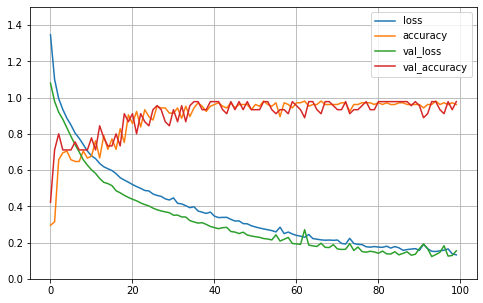

In [63]:
df_history_0 = pd.DataFrame(history_0.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.5)
plt.show()

## Usando MLP

In [64]:
fashion_mnist = keras.datasets.fashion_mnist

In [65]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [66]:
X_train_full.shape

(60000, 28, 28)

In [67]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [68]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [69]:
class_names[y_train[0]]

'Coat'

## Criando o modelo usando a sequential API

In [70]:
model = keras.models.Sequential([
            keras.layers.Flatten(input_shape=[28, 28]),
            keras.layers.Dense(300, activation="relu"),
            keras.layers.Dense(100, activation="relu"),
            keras.layers.Dense(10, activation="softmax"),
        ])

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_11 (Dense)            (None, 300)               235500    
                                                                 
 dense_12 (Dense)            (None, 100)               30100     
                                                                 
 dense_13 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


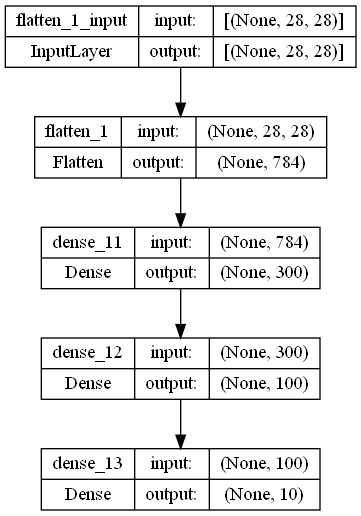

In [72]:
## Visualizando o modelo por imagens
keras.utils.plot_model(model, to_file='graph.png', show_shapes=True)

In [73]:
# !pip install graphviz

In [74]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [75]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7050 - accuracy: 0.7691 - val_loss: 0.5013 - val_accuracy: 0.8348
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4853 - accuracy: 0.8303 - val_loss: 0.4560 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4424 - accuracy: 0.8453 - val_loss: 0.4356 - val_accuracy: 0.8498
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4167 - accuracy: 0.8539 - val_loss: 0.3970 - val_accuracy: 0.8620
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3964 - accuracy: 0.8613 - val_loss: 0.4444 - val_accuracy: 0.8328
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3800 - accuracy: 0.8655 - val_loss: 0.3819 - val_accuracy: 0.8622
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3656 - accuracy: 0.8702 - val_loss: 0.3627 - val_accuracy:

## Curvas de aprendizado

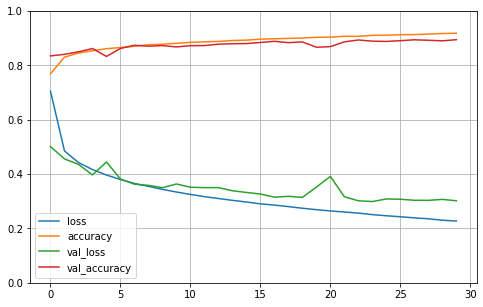

In [76]:
df_history = pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

### Usando o modelo para fazer predições

In [77]:
X_new = X_test[:3]
X_new

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [88]:
y_proba = model.predict(X_new)
y_proba.round(2)
y_pred = np.array([instance.argmax() for instance in y_proba])
y_pred

1/1 [==============================] - 0s 15ms/step


array([9, 2, 1], dtype=int64)

In [90]:
def classes_by_numbers(numbers):
    return np.array([class_names[number] for number in numbers])

In [92]:
y_pred_classes = classes_by_numbers(y_pred)
y_pred_classes

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U10')

## Construindo uma MLP de regressão usando a Sequential API

In [103]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [104]:
housing = fetch_california_housing()

In [105]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [106]:
scaler = StandardScaler()

In [107]:
X_train

array([[   2.525     ,   26.        ,    3.31603774, ...,    3.57075472,
          33.87      , -118.2       ],
       [   2.4167    ,   43.        ,    4.73333333, ...,    3.10666667,
          36.71      , -119.83      ],
       [   1.2091    ,   39.        ,    4.28291317, ...,    3.232493  ,
          33.95      , -118.27      ],
       ...,
       [   1.5474    ,   44.        ,    4.67493113, ...,    3.84573003,
          32.71      , -117.13      ],
       [   2.4595    ,   36.        ,    4.34369287, ...,    2.75137112,
          34.45      , -119.28      ],
       [   5.0267    ,    5.        ,    6.08689655, ...,    2.76275862,
          35.24      , -120.52      ]])

In [108]:
X_train = scaler.fit_transform(X_train)

In [109]:
X_train

array([[-0.71263301, -0.21414668, -1.00102961, ...,  0.12287171,
        -0.8246492 ,  0.68883129],
       [-0.76949421,  1.13849935, -0.3243675 , ...,  0.02595615,
         0.50857936, -0.12423766],
       [-1.40352541,  0.8202297 , -0.53941245, ...,  0.05223248,
        -0.78709346,  0.65391421],
       ...,
       [-1.22590636,  1.21806677, -0.35225057, ...,  0.18029484,
        -1.36920734,  1.22256367],
       [-0.74702275,  0.58152746, -0.51039428, ..., -0.04824026,
        -0.55237012,  0.15011075],
       [ 0.60084484, -1.88506237,  0.32186674, ..., -0.0458622 ,
        -0.18150725, -0.46842023]])

In [110]:
X_valid = scaler.transform(X_valid)

In [111]:
X_test

array([[   3.        ,   25.        ,    5.27108434, ...,    3.89156627,
          36.8       , -119.71      ],
       [   2.6103    ,   44.        ,    4.06734007, ...,    2.03030303,
          34.41      , -119.69      ],
       [   1.2188    ,   37.        ,    2.88235294, ...,    2.85294118,
          34.13      , -118.26      ],
       ...,
       [   2.7451    ,   42.        ,    4.29528536, ...,    2.14888337,
          33.73      , -118.3       ],
       [   2.8438    ,   32.        ,    3.85198556, ...,    3.80144404,
          33.95      , -118.37      ],
       [   5.2072    ,   20.        ,    6.17021277, ...,    2.88829787,
          34.24      , -117.41      ]])

In [112]:
X_test = scaler.transform(X_test)

In [113]:
X_test

array([[-0.46324181, -0.2937141 , -0.06762802, ...,  0.18986682,
         0.55082956, -0.06437983],
       [-0.6678476 ,  1.21806677, -0.64233392, ..., -0.19882099,
        -0.57114799, -0.05440352],
       [-1.39843258,  0.66109487, -1.20808456, ..., -0.02702937,
        -0.70259306,  0.65890237],
       ...,
       [-0.597073  ,  1.05893194, -0.53350557, ..., -0.17405784,
        -0.89037173,  0.63894976],
       [-0.54525214,  0.2632578 , -0.74515103, ...,  0.17104659,
        -0.78709346,  0.60403268],
       [ 0.6956135 , -0.69155117,  0.36164456, ..., -0.01964583,
        -0.65095393,  1.08289538]])

In [115]:
X_train.shape[1:]

(8,)

In [118]:
# Criando o modelo
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 0.8433 - val_loss: 3.9774
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 1.3587 - val_loss: 0.4468
Epoch 3/20
363/363 [==============================] - 0s 875us/step - loss: 0.4275 - val_loss: 0.3975
Epoch 4/20
363/363 [==============================] - 0s 952us/step - loss: 0.3996 - val_loss: 0.3783
Epoch 5/20
363/363 [==============================] - 0s 941us/step - loss: 0.3894 - val_loss: 0.3758
Epoch 6/20
363/363 [==============================] - 0s 910us/step - loss: 0.3842 - val_loss: 0.3679
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3792 - val_loss: 0.3654
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3770 - val_loss: 0.3615
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.3744 - val_loss: 0.3945
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3719 - val_loss

In [119]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 40ms/step


In [120]:
y_pred

array([[1.06833  ],
       [3.2199051],
       [1.3733249]], dtype=float32)

In [123]:
y_test[:3]

array([0.728, 5.   , 2.188])

In [124]:
mse_test

0.37804168462753296

In [125]:
y_pred = model.predict(X_test)

162/162 [==============================] - 0s 590us/step


In [126]:
y_pred

array([[1.06833  ],
       [3.2199051],
       [1.3733249],
       ...,
       [2.6002748],
       [1.752409 ],
       [1.8061736]], dtype=float32)

In [129]:
y_test

array([0.728, 5.   , 2.188, ..., 2.554, 1.817, 1.643])

## Construindo modelos complexos usando a functional API
Um bom exemplo de rede neural não sequencial é uma rede neural Wide and Deep. Essa aquitetura de rede neural foi apresentada em um artigo de 2016 de [Heng-Tze et al](https://arxiv.org/abs/1606.07792). Ela interliga todas ou parte das entradas diretamente à camada de saída, tal como a Figura 1 do paper. Essa arquitetura possibilita a rede neural aprender padrões profundos (por meio do caminho profundo) e regras simples (por meio de caminho curto). Em contrapartida, uma MLP normal força os dados a circularem por meio da pilha completa de camadas. Desse modo, padrões simples nos dados podem acabar sendo distorcidos. 

In [138]:
# Construiremos uma NN para lidar com os dados dos imóveis da Califórnia.
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu')(input_)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [139]:
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_28 (Dense)               (None, 30)           270         ['input_3[0][0]']                
                                                                                                  
 dense_29 (Dense)               (None, 30)           930         ['dense_28[0][0]']               
                                                                                                  
 concatenate_3 (Concatenate)    (None, 38)           0           ['input_3[0][0]',                
                                                                  'dense_29[0][0]']         

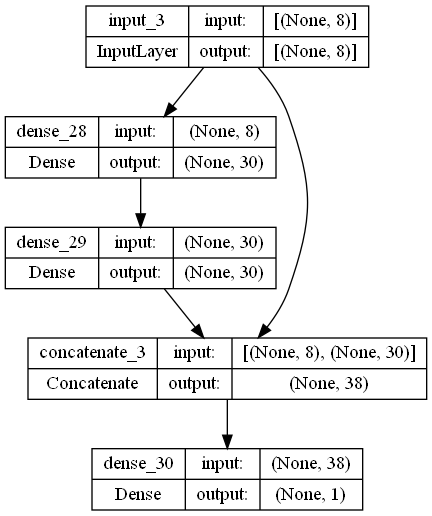

In [140]:
## Visualizando o modelo por imagens
keras.utils.plot_model(model, to_file='graph.png', show_shapes=True)

Nesse caso, basta compilar o modelo, treinar, avaliar e usar. 

In [141]:
#TODO

### Subconjuntos de características
Podemos dividir a entrada da NN como subconjuntos. Por exemplo, criar um conjunto A que será o primeiro input para o caminho amplo (direto conectado com a saída) e um conjunto B que será o segundo input para o caminho profundo (que passa pela pilha de camadas profundas)

In [142]:
# Input A, características de 0 a 4
input_A = keras.layers.Input(shape=[5], name="wide_input")
# Input B, características de 2 a 7
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [143]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 deep_input (InputLayer)        [(None, 6)]          0           []                               
                                                                                                  
 dense_31 (Dense)               (None, 30)           210         ['deep_input[0][0]']             
                                                                                                  
 wide_input (InputLayer)        [(None, 5)]          0           []                               
                                                                                                  
 dense_32 (Dense)               (None, 30)           930         ['dense_31[0][0]']               
                                                                                            

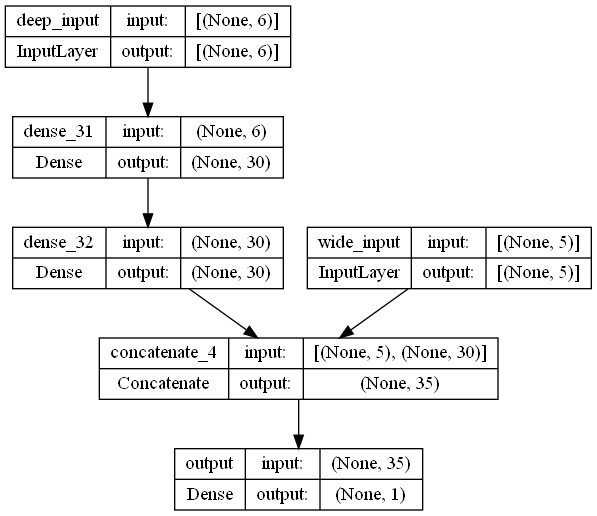

In [144]:
## Visualizando o modelo por imagens
keras.utils.plot_model(model, to_file='graph.png', show_shapes=True)

In [146]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [147]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [148]:
history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                   validation_data=((X_valid_A, X_valid_B), y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2881 - val_loss: 0.9869
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7878 - val_loss: 0.7108
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6679 - val_loss: 0.6426
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6262 - val_loss: 0.6086
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5986 - val_loss: 0.5826
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5765 - val_loss: 0.5614
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5571 - val_loss: 0.5445
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5401 - val_loss: 0.5256
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5253 - val_loss: 0.5134
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5123 - val_loss: 0.4999

In [149]:
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

1/1 [==============================] - 0s 46ms/step


In [152]:
y_test[:3]

array([0.728, 5.   , 2.188])

In [150]:
y_pred

array([[0.82509077],
       [2.4086728 ],
       [1.4941478 ]], dtype=float32)

In [153]:
mse_test

0.4789975583553314